***
# Currency Rates (in USD) since year 1999
## -Shrey Aggarwal
## October 3, 2021
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Data Collected from <a href = https://excelrates.com/> Excelrates </a>

In [2]:
sheet = pd.read_csv('Excelrates.csv')
sheet

,Date,USD/USD,USD/EUR,USD/INR,USD/GBP,USD/CNY
0,05 Oct 2021,1,1.1602,0.0134,1.3622,0.1551
1,04 Oct 2021,1,1.1636,0.0135,1.3605,0.1551
2,03 Oct 2021,1,1.1600,0.0135,1.3543,0.1551
3,02 Oct 2021,1,1.1600,0.0135,1.3543,0.1551
4,01 Oct 2021,1,1.1600,0.0135,1.3543,0.1551
...,...,...,...,...,...,...
8306,08 Jan 1999,1,1.1659,This date is currently not available.,1.6435,This date is currently not available.
8307,07 Jan 1999,1,1.1632,This date is currently not available.,1.6479,This date is currently not available.
8308,06 Jan 1999,1,1.1743,This date is currently not available.,1.6596,This date is currently not available.
8309,05 Jan 1999,1,1.1790,This date is currently not available.,1.6554,This date is currently not available.


In [3]:
sheet = sheet.replace('This date is currently not available.', 0)
sheet['USD/INR'] = sheet['USD/INR'].astype(float)
sheet['USD/CNY'] = sheet['USD/CNY'].astype(float)
sheet

,Date,USD/USD,USD/EUR,USD/INR,USD/GBP,USD/CNY
0,05 Oct 2021,1,1.1602,0.0134,1.3622,0.1551
1,04 Oct 2021,1,1.1636,0.0135,1.3605,0.1551
2,03 Oct 2021,1,1.1600,0.0135,1.3543,0.1551
3,02 Oct 2021,1,1.1600,0.0135,1.3543,0.1551
4,01 Oct 2021,1,1.1600,0.0135,1.3543,0.1551
...,...,...,...,...,...,...
8306,08 Jan 1999,1,1.1659,0.0000,1.6435,0.0000
8307,07 Jan 1999,1,1.1632,0.0000,1.6479,0.0000
8308,06 Jan 1999,1,1.1743,0.0000,1.6596,0.0000
8309,05 Jan 1999,1,1.1790,0.0000,1.6554,0.0000


In [4]:
sheet['Date'] = pd.to_datetime(sheet['Date'])
sheet

,Date,USD/USD,USD/EUR,USD/INR,USD/GBP,USD/CNY
0,2021-10-05,1,1.1602,0.0134,1.3622,0.1551
1,2021-10-04,1,1.1636,0.0135,1.3605,0.1551
2,2021-10-03,1,1.1600,0.0135,1.3543,0.1551
3,2021-10-02,1,1.1600,0.0135,1.3543,0.1551
4,2021-10-01,1,1.1600,0.0135,1.3543,0.1551
...,...,...,...,...,...,...
8306,1999-01-08,1,1.1659,0.0000,1.6435,0.0000
8307,1999-01-07,1,1.1632,0.0000,1.6479,0.0000
8308,1999-01-06,1,1.1743,0.0000,1.6596,0.0000
8309,1999-01-05,1,1.1790,0.0000,1.6554,0.0000


In [5]:
def get_quarter(time):
    yr = time.year
    qtr = time.quarter
    month = {1:1, 2:4, 3:7, 4:10}
    return str(month[qtr]) + '/01/' + str(yr)

sheet['Date'] = sheet['Date'].apply(get_quarter)

sheet['Date'] = pd.to_datetime(sheet['Date']).dt.date
sheet


,Date,USD/USD,USD/EUR,USD/INR,USD/GBP,USD/CNY
0,2021-10-01,1,1.1602,0.0134,1.3622,0.1551
1,2021-10-01,1,1.1636,0.0135,1.3605,0.1551
2,2021-10-01,1,1.1600,0.0135,1.3543,0.1551
3,2021-10-01,1,1.1600,0.0135,1.3543,0.1551
4,2021-10-01,1,1.1600,0.0135,1.3543,0.1551
...,...,...,...,...,...,...
8306,1999-01-01,1,1.1659,0.0000,1.6435,0.0000
8307,1999-01-01,1,1.1632,0.0000,1.6479,0.0000
8308,1999-01-01,1,1.1743,0.0000,1.6596,0.0000
8309,1999-01-01,1,1.1790,0.0000,1.6554,0.0000


In [6]:
curconv = sheet.groupby('Date').mean()
curconv

,USD/USD,USD/EUR,USD/INR,USD/GBP,USD/CNY
Date,,,,,
1999-01-01,1,1.121282,0.000000,1.632843,0.000000
1999-04-01,1,1.057315,0.000000,1.606959,0.000000
1999-07-01,1,1.048833,0.000000,1.601497,0.000000
1999-10-01,1,1.037736,0.000000,1.630702,0.000000
2000-01-01,1,0.986949,0.000000,1.605678,0.000000
...,...,...,...,...,...
2020-10-01,1,1.193079,0.013551,1.320426,0.151045
2021-01-01,1,1.205546,0.013717,1.378289,0.154267
2021-04-01,1,1.204301,0.013557,1.397573,0.154813


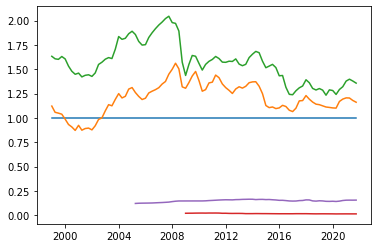

In [7]:
plt.plot(curconv.index, curconv['USD/USD'])
plt.plot(curconv.index, curconv['USD/EUR'])
plt.plot(curconv.index, curconv['USD/GBP'])

plt.plot(curconv[curconv['USD/INR'] != 0].index, curconv[curconv['USD/INR'] != 0]['USD/INR'])
plt.plot(curconv[curconv['USD/CNY'] != 0].index, curconv[curconv['USD/CNY'] != 0]['USD/CNY'])

In [8]:
def reciprocal(x):
    if x != 0:
        x = 1/x
    return x

for i in curconv.columns.values:
    curconv[i] = curconv[i].apply(reciprocal)

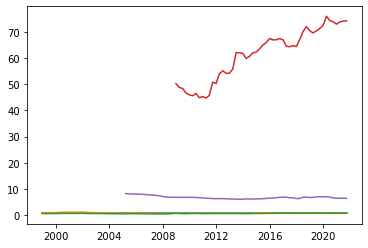

In [9]:
plt.plot(curconv.index, curconv['USD/USD'])
plt.plot(curconv.index, curconv['USD/EUR'])
plt.plot(curconv.index, curconv['USD/GBP'])

plt.plot(curconv[curconv['USD/INR'] != 0].index, curconv[curconv['USD/INR'] != 0]['USD/INR'])
plt.plot(curconv[curconv['USD/CNY'] != 0].index, curconv[curconv['USD/CNY'] != 0]['USD/CNY'])

In [10]:
for i in curconv.columns.values:
    curconv[i] = curconv[i].apply(reciprocal)
    
curconv.replace(0,'NULL')

,USD/USD,USD/EUR,USD/INR,USD/GBP,USD/CNY
Date,,,,,
1999-01-01,1.0,1.121282,NULL,1.632843,NULL
1999-04-01,1.0,1.057315,NULL,1.606959,NULL
1999-07-01,1.0,1.048833,NULL,1.601497,NULL
1999-10-01,1.0,1.037736,NULL,1.630702,NULL
2000-01-01,1.0,0.986949,NULL,1.605678,NULL
...,...,...,...,...,...
2020-10-01,1.0,1.193079,0.013551,1.320426,0.151045
2021-01-01,1.0,1.205546,0.013717,1.378289,0.154267
2021-04-01,1.0,1.204301,0.013557,1.397573,0.154813


In [11]:
arr = np.zeros(6)
arr = arr.reshape(2,3)
convert = pd.DataFrame(arr, columns = ['Term', 'Currency','USD/Currency'])

for i in range(curconv.shape[0]):
    for j in range(curconv.shape[1]):
        term = curconv.index.values[i]
        currency = curconv.columns.values[j][4:]
        conv = curconv.iloc[i,j]
        temp = {'Term': term, 'Currency': currency, 'USD/Currency': conv}
        convert = convert.append(temp, ignore_index=True)
        
convert.drop([0,1], inplace=True)
convert.reset_index(inplace=True, drop=True)
convert['USD/Currency'] = convert['USD/Currency'].apply(lambda x: round(x,3))
convert

,Term,Currency,USD/Currency
0,1999-01-01,USD,1.000
1,1999-01-01,EUR,1.121
2,1999-01-01,INR,0.000
3,1999-01-01,GBP,1.633
4,1999-01-01,CNY,0.000
...,...,...,...
455,2021-10-01,USD,1.000
456,2021-10-01,EUR,1.161
457,2021-10-01,INR,0.013
458,2021-10-01,GBP,1.357


## IMPORT PYTHON TO SQL WORKBENCH

In [12]:
import pymysql

In [13]:
conn = pymysql.connect(database= 'gold_stats', user='root', password='hachi815')
cursor = conn.cursor()

In [16]:
insert_query = 'INSERT INTO Currency_conv VALUES '
for i in range(convert.shape[0]):
    insert_query += "('"
    insert_query += str(convert.iloc[i,0])
    insert_query += "', '"
    insert_query += str(convert.iloc[i,1])
    insert_query += "', "
    insert_query += str(convert.iloc[i,2])
    insert_query += '), '
    
        
insert_query = insert_query[:-2] + ';'
insert_query = insert_query.replace('nan', 'NULL')
insert_query[:1000]

"INSERT INTO Currency_conv VALUES ('1999-01-01', 'USD', 1.0), ('1999-01-01', 'EUR', 1.121), ('1999-01-01', 'INR', 0.0), ('1999-01-01', 'GBP', 1.633), ('1999-01-01', 'CNY', 0.0), ('1999-04-01', 'USD', 1.0), ('1999-04-01', 'EUR', 1.057), ('1999-04-01', 'INR', 0.0), ('1999-04-01', 'GBP', 1.607), ('1999-04-01', 'CNY', 0.0), ('1999-07-01', 'USD', 1.0), ('1999-07-01', 'EUR', 1.049), ('1999-07-01', 'INR', 0.0), ('1999-07-01', 'GBP', 1.601), ('1999-07-01', 'CNY', 0.0), ('1999-10-01', 'USD', 1.0), ('1999-10-01', 'EUR', 1.038), ('1999-10-01', 'INR', 0.0), ('1999-10-01', 'GBP', 1.631), ('1999-10-01', 'CNY', 0.0), ('2000-01-01', 'USD', 1.0), ('2000-01-01', 'EUR', 0.987), ('2000-01-01', 'INR', 0.0), ('2000-01-01', 'GBP', 1.606), ('2000-01-01', 'CNY', 0.0), ('2000-04-01', 'USD', 1.0), ('2000-04-01', 'EUR', 0.932), ('2000-04-01', 'INR', 0.0), ('2000-04-01', 'GBP', 1.532), ('2000-04-01', 'CNY', 0.0), ('2000-07-01', 'USD', 1.0), ('2000-07-01', 'EUR', 0.907), ('2000-07-01', 'INR', 0.0), ('2000-07-01', '

In [17]:
cursor.execute(insert_query)
conn.commit()